<img src = "https://global-uploads.webflow.com/5f0d53c042a9ed6288de7f8d/5f6337ae2cfaa10946ceeb06_Hacktiv8%20logo%20horizontal%2001%20black-p-500.png" width = 800>

# Assignment 2
### Sesi 8_PYTN-KS09-002
### Nama : Elsa Wulandari

# 1. Project Overview
Tujuan dari proyek ini adalah untuk melakukan statistik praktis dengan Python menggunakan Dataset Penjualan Properti NYC dari Kaggle. Dataset ini adalah catatan dari setiap bangunan atau unit bangunan (apartemen, dll) yang dijual di pasar properti New York City selama periode 12 bulan dari September 2016 hingga September 2017.Pada link berikut ini: https://www.kaggle.com/datasets/new-york-city/nyc-property-sales

Data yang terdapat di dataset ini yaitu :
location, address, type, sale price, and sale date of building units sold,Referensi di bidang yang lebih rumit:
  **BOROUGH** : Kode digit untuk borough tempat properti tersebut berada; dalam urutan ini adalah Manhattan (1), Bronx (2), Brooklyn (3), Queens (4), dan Staten Island (5).

BLOCK; LOT: Kombinasi borough, block, dan lot membentuk kunci unik untuk properti di New York City. Biasa disebut BBL.

BUILDING CLASS AT PRESENT dan BUILDING CLASS AT TIME OF SALE: Jenis bangunan pada berbagai titik waktu.



# 2. Mempersiapkan Data

Hal pertama adalah mengimport semua perpustakaan yang akan digunakan pada proyek ini.

### Import Libraries

In [244]:
!pip install statsmodels

'pip' is not recognized as an internal or external command,
operable program or batch file.


In [247]:
import pandas as pd
import numpy as np
import matplotlib as mpl
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats
import statistics
import scipy.stats as scistats
import statsmodels.api as sm
%matplotlib inline

In [248]:
df = pd.read_csv('nyc-rolling-sales.csv')
print('Data is loaded into a Pandas data frame!')

Data is loaded into a Pandas data frame!


# 3. Data Preprocessing

In [249]:
df.info()#Melihat tipe objek masing-masing kolom

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 84548 entries, 0 to 84547
Data columns (total 22 columns):
 #   Column                          Non-Null Count  Dtype 
---  ------                          --------------  ----- 
 0   Unnamed: 0                      84548 non-null  int64 
 1   BOROUGH                         84548 non-null  int64 
 2   NEIGHBORHOOD                    84548 non-null  object
 3   BUILDING CLASS CATEGORY         84548 non-null  object
 4   TAX CLASS AT PRESENT            84548 non-null  object
 5   BLOCK                           84548 non-null  int64 
 6   LOT                             84548 non-null  int64 
 7   EASE-MENT                       84548 non-null  object
 8   BUILDING CLASS AT PRESENT       84548 non-null  object
 9   ADDRESS                         84548 non-null  object
 10  APARTMENT NUMBER                84548 non-null  object
 11  ZIP CODE                        84548 non-null  int64 
 12  RESIDENTIAL UNITS               84548 non-null

In [250]:
display(df)#Menampilkan 5 baris bawah dan atas dari kumpulan data 

,Unnamed: 0,BOROUGH,NEIGHBORHOOD,BUILDING CLASS CATEGORY,TAX CLASS AT PRESENT,BLOCK,LOT,EASE-MENT,BUILDING CLASS AT PRESENT,ADDRESS,...,RESIDENTIAL UNITS,COMMERCIAL UNITS,TOTAL UNITS,LAND SQUARE FEET,GROSS SQUARE FEET,YEAR BUILT,TAX CLASS AT TIME OF SALE,BUILDING CLASS AT TIME OF SALE,SALE PRICE,SALE DATE
0,4,1,ALPHABET CITY,07 RENTALS - WALKUP APARTMENTS,2A,392,6,,C2,153 AVENUE B,...,5,0,5,1633,6440,1900,2,C2,6625000,2017-07-19 00:00:00
1,5,1,ALPHABET CITY,07 RENTALS - WALKUP APARTMENTS,2,399,26,,C7,234 EAST 4TH STREET,...,28,3,31,4616,18690,1900,2,C7,-,2016-12-14 00:00:00
2,6,1,ALPHABET CITY,07 RENTALS - WALKUP APARTMENTS,2,399,39,,C7,197 EAST 3RD STREET,...,16,1,17,2212,7803,1900,2,C7,-,2016-12-09 00:00:00
3,7,1,ALPHABET CITY,07 RENTALS - WALKUP APARTMENTS,2B,402,21,,C4,154 EAST 7TH STREET,...,10,0,10,2272,6794,1913,2,C4,3936272,2016-09-23 00:00:00
4,8,1,ALPHABET CITY,07 RENTALS - WALKUP APARTMENTS,2A,404,55,,C2,301 EAST 10TH STREET,...,6,0,6,2369,4615,1900,2,C2,8000000,2016-11-17 00:00:00
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
84543,8409,5,WOODROW,02 TWO FAMILY DWELLINGS,1,7349,34,,B9,37 QUAIL LANE,...,2,0,2,2400,2575,1998,1,B9,450000,2016-11-28 00:00:00
84544,8410,5,WOODROW,02 TWO FAMILY DWELLINGS,1,7349,78,,B9,32 PHEASANT LANE,...,2,0,2,2498,2377,1998,1,B9,550000,2017-04-21 00:00:00
84545,8411,5,WOODROW,02 TWO FAMILY DWELLINGS,1,7351,60,,B2,49 PITNEY AVENUE,...,2,0,2,4000,1496,1925,1,B2,460000,2017-07-05 00:00:00
84546,8412,5,WOODROW,22 STORE BUILDINGS,4,7100,28,,K6,2730 ARTHUR KILL ROAD,...,0,7,7,208033,64117,2001,4,K6,11693337,2016-12-21 00:00:00


In [251]:
df.shape#Mengetahui dimensi dari dataset

(84548, 22)

In [252]:
df.columns.values#Melihat nama-nama columns yang ada di dataset

array(['Unnamed: 0', 'BOROUGH', 'NEIGHBORHOOD', 'BUILDING CLASS CATEGORY',
       'TAX CLASS AT PRESENT', 'BLOCK', 'LOT', 'EASE-MENT',
       'BUILDING CLASS AT PRESENT', 'ADDRESS', 'APARTMENT NUMBER',
       'ZIP CODE', 'RESIDENTIAL UNITS', 'COMMERCIAL UNITS', 'TOTAL UNITS',
       'LAND SQUARE FEET', 'GROSS SQUARE FEET', 'YEAR BUILT',
       'TAX CLASS AT TIME OF SALE', 'BUILDING CLASS AT TIME OF SALE',
       'SALE PRICE', 'SALE DATE'], dtype=object)

Mengubah value pada BOROUGH menjadi sebuah string nama BOROUGH berdasarkan valuenya.

In [254]:
df["BOROUGH"].replace({1: "Manhattan", 2: "Bronx", 3: "Brooklyn", 4: "Queens", 5: "Staten Island"}, inplace=True)

In [255]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 84548 entries, 0 to 84547
Data columns (total 22 columns):
 #   Column                          Non-Null Count  Dtype 
---  ------                          --------------  ----- 
 0   Unnamed: 0                      84548 non-null  int64 
 1   BOROUGH                         84548 non-null  object
 2   NEIGHBORHOOD                    84548 non-null  object
 3   BUILDING CLASS CATEGORY         84548 non-null  object
 4   TAX CLASS AT PRESENT            84548 non-null  object
 5   BLOCK                           84548 non-null  int64 
 6   LOT                             84548 non-null  int64 
 7   EASE-MENT                       84548 non-null  object
 8   BUILDING CLASS AT PRESENT       84548 non-null  object
 9   ADDRESS                         84548 non-null  object
 10  APARTMENT NUMBER                84548 non-null  object
 11  ZIP CODE                        84548 non-null  int64 
 12  RESIDENTIAL UNITS               84548 non-null

Menghapus kolom yang tidak diperlukan

1. Kolom Unnamed: 0 sebagai iterator
2. Kolom EASE-MENT tidak mengandung nilai yang dibutuhkan untuk analisis berikutnya

In [256]:
df.drop(columns=['Unnamed: 0', 'EASE-MENT'], inplace=True)

In [257]:
#Ubah type data menjadi string
string = ["BOROUGH","NEIGHBORHOOD","ADDRESS","APARTMENT NUMBER"]
for col in string : 
    df[col] = df[col].astype("string")

In [258]:
#Ubah type data menjadi categorical
categorical = ["BUILDING CLASS CATEGORY","TAX CLASS AT PRESENT","BUILDING CLASS AT PRESENT","BUILDING CLASS AT TIME OF SALE"]

for col in categorical: 
    df[col] = df[col].astype("category")

In [259]:
df['SALE DATE'] = pd.to_datetime(df['SALE DATE'], errors='coerce')

In [260]:
#Ubah Type data menjadi numeric
numeric = ["LAND SQUARE FEET","GROSS SQUARE FEET","SALE PRICE" ]

for col in numeric: 
    df[col] = pd.to_numeric(df[col], errors='coerce')

In [261]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 84548 entries, 0 to 84547
Data columns (total 20 columns):
 #   Column                          Non-Null Count  Dtype         
---  ------                          --------------  -----         
 0   BOROUGH                         84548 non-null  string        
 1   NEIGHBORHOOD                    84548 non-null  string        
 2   BUILDING CLASS CATEGORY         84548 non-null  category      
 3   TAX CLASS AT PRESENT            84548 non-null  category      
 4   BLOCK                           84548 non-null  int64         
 5   LOT                             84548 non-null  int64         
 6   BUILDING CLASS AT PRESENT       84548 non-null  category      
 7   ADDRESS                         84548 non-null  string        
 8   APARTMENT NUMBER                84548 non-null  string        
 9   ZIP CODE                        84548 non-null  int64         
 10  RESIDENTIAL UNITS               84548 non-null  int64         
 11  CO

Mengecek jumlah missing values pada setiap kolom

In [262]:
df.isnull().sum()

BOROUGH                               0
NEIGHBORHOOD                          0
BUILDING CLASS CATEGORY               0
TAX CLASS AT PRESENT                  0
BLOCK                                 0
LOT                                   0
BUILDING CLASS AT PRESENT             0
ADDRESS                               0
APARTMENT NUMBER                      0
ZIP CODE                              0
RESIDENTIAL UNITS                     0
COMMERCIAL UNITS                      0
TOTAL UNITS                           0
LAND SQUARE FEET                  26252
GROSS SQUARE FEET                 27612
YEAR BUILT                            0
TAX CLASS AT TIME OF SALE             0
BUILDING CLASS AT TIME OF SALE        0
SALE PRICE                        14561
SALE DATE                             0
dtype: int64

Dapat dilihat bahwa **LAND SQUARE FEET**,**GROSS SQUARE FEET** dan **SALE PRICE** memiliki nilai null

In [263]:
df.dropna(inplace=True)# Menghapus nilai null

In [264]:
df.isnull().sum()

BOROUGH                           0
NEIGHBORHOOD                      0
BUILDING CLASS CATEGORY           0
TAX CLASS AT PRESENT              0
BLOCK                             0
LOT                               0
BUILDING CLASS AT PRESENT         0
ADDRESS                           0
APARTMENT NUMBER                  0
ZIP CODE                          0
RESIDENTIAL UNITS                 0
COMMERCIAL UNITS                  0
TOTAL UNITS                       0
LAND SQUARE FEET                  0
GROSS SQUARE FEET                 0
YEAR BUILT                        0
TAX CLASS AT TIME OF SALE         0
BUILDING CLASS AT TIME OF SALE    0
SALE PRICE                        0
SALE DATE                         0
dtype: int64

In [265]:
df.shape

(48244, 20)

In [266]:
df_temp = df[
    (df['TOTAL UNITS'] != 0) &
    (df['LAND SQUARE FEET'] != 0) &
    (df['GROSS SQUARE FEET'] != 0) &
    (df['YEAR BUILT'] != 0) &
    (df['SALE PRICE'] != 0) &
    (df['ZIP CODE'] != 0)
       ]
df_temp.shape

(29270, 20)

In [267]:
df = df_temp
df.describe()

,BLOCK,LOT,ZIP CODE,RESIDENTIAL UNITS,COMMERCIAL UNITS,TOTAL UNITS,LAND SQUARE FEET,GROSS SQUARE FEET,YEAR BUILT,TAX CLASS AT TIME OF SALE,SALE PRICE
count,29270.00,29270.00,29270.00,29270.00,29270.00,29270.00,29270.00,29270.00,29270.00,29270.00,29270.00
mean,5550.71,61.18,10997.38,3.05,0.33,3.38,4204.05,4602.59,1940.69,1.23,1637125.19
std,3780.05,116.56,476.34,20.04,14.03,24.60,35486.74,34130.59,30.53,0.69,17011320.86
min,5.00,1.00,10001.00,0.00,0.00,1.00,200.00,120.00,1800.00,1.00,1.00
25%,2678.50,19.00,10462.00,1.00,0.00,1.00,2000.00,1360.00,1920.00,1.00,420000.00
50%,4903.00,38.00,11221.00,2.00,0.00,2.00,2500.00,1872.00,1930.00,1.00,620000.00
75%,7837.75,64.00,11373.00,2.00,0.00,2.00,4000.00,2672.00,1960.00,1.00,950000.00
max,16319.00,3710.00,11694.00,1844.00,2261.00,2261.00,4228300.00,3750565.00,2017.00,4.00,2210000000.00


---
# A. Measure of Central Tendency : Mean

Mean adalah nilai rata-rata dari suatu bilangan. Selain itu, arti mean dapat bermakna juga untuk mengetahui jumlah seluruh data dengan membaginya sesuai jumlah datanya.

### Pertanyaan : Berapakah harga jual rata-rata properti berdasarkan Kategori kelas bangunan ? 

In [268]:
df_mean = df.pivot_table(
    index='BUILDING CLASS CATEGORY', 
    values='SALE PRICE', 
    aggfunc=np.mean
)

#Mengganti nama kolom 'SALE PRICE' menjadi 'MEAN SALE PRICE'
df_mean.rename(columns={'SALE PRICE':'MEAN SALE PRICE'}, inplace=True)

#Mengurutkan berdasarkan kolom 'MEAN SALE PRICE'
df_mean.sort_values('MEAN SALE PRICE', ascending=False, inplace=True)
df_mean.head()

,MEAN SALE PRICE
BUILDING CLASS CATEGORY,
25 LUXURY HOTELS,142377525.00
11A CONDO-RENTALS,56673185.25
31 COMMERCIAL VACANT LAND,41825000.00
21 OFFICE BUILDINGS,39050651.85
34 THEATRES,23937500.00


**Conclusion**

Berdasarkan hasil diatas dapat dilihat bahwa Kelas bangunan 25 LUXURY HOTEL memiliki rata-rata harga tertinggi yaitu sebesar **142,377,500 USD DOLLAR** dan 34 THEATRES  memiliki rata-rata , yaitu sebesar **23,937,500 USD DOLLAR**

---
# B. Measure of Central Tendency : Median

Median dapat bermakna untuk menemukan nilai tengah-tengah dari sekumpulan bilangan

### Pertanyaan : Berapakah median dari harga jual properti yang terdapat pada 5 kategori kelas bangunan teratas ?

In [269]:
pd.set_option('display.float_format', lambda x: '%.2f' % x)
# Mencari median harga jual berdasarkan kelas bangunan
df.groupby("BUILDING CLASS CATEGORY").agg("median")["SALE PRICE"].sort_values(ascending=False)

BUILDING CLASS CATEGORY
25 LUXURY HOTELS                               133917650.00
31 COMMERCIAL VACANT LAND                       41825000.00
11A CONDO-RENTALS                               32148370.50
34 THEATRES                                     29250000.00
08 RENTALS - ELEVATOR APARTMENTS                14200000.00
23 LOFT BUILDINGS                                9374578.00
40 SELECTED GOVERNMENTAL FACILITIES              8000000.50
32 HOSPITAL AND HEALTH FACILITIES                5028750.00
36 OUTDOOR RECREATIONAL FACILITIES               5000000.00
38 ASYLUMS AND HOMES                             4874798.00
27 FACTORIES                                     2750000.00
21 OFFICE BUILDINGS                              2600000.00
30 WAREHOUSES                                    2164500.00
33 EDUCATIONAL FACILITIES                        1800000.00
22 STORE BUILDINGS                               1607500.00
37 RELIGIOUS FACILITIES                          1600000.00
07 RENTALS - WAL

**Conclusion**

Dari hasil tersebut dapat dilihat bahwa 5 kategori bangunan yang memiliki nilai median teratas yaitu :
1. 25 LUXURY HOTELS dengan Median **133917650.00 USD Dollar**.
2. 31 COMMERCIAL VACANT LAND dengan Median **41825000.00 USD Dollar**.
3. 11A CONDO-RENTALS dengan Median **133917650.00 USD Dollar**.
4. 34 THEATRES dengan Median **29250000.00 USD Dollar**.
5. 08 RENTALS - ELEVATOR APARTMENTS dengan Median **14200000.00 USD Dollar**.


---
# C. Measure of Central Tendency : Mode

Mode atau Modus digunakan untuk mengetahui bilangan atau kata yang paling banyak muncul. 

### Pertanyaan : Bangunan yang beralamat dimanakah yang paling sering terjual disetiap wilayah  ?

In [288]:
#Membuat pivot table dengan index 'BOROUGH', values 'ADDRESS' dan aggfunc=stats.mode dimana stats.mode ini akan mencari modus 
df_mode = df.pivot_table(
    index='BOROUGH', 
    values='ADDRESS', 
    aggfunc= stats.mode
)

#Rename kolom 'ADDRESS' menjadi 'MOST ADDRESS'
df_mode.rename(columns={'ADDRESS':'MOST ADDRESS'}, inplace=True)

c:\Users\acer\AppData\Local\Programs\Python\Python310\lib\site-packages\pandas\core\groupby\groupby.py:1476: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdims` to True or False to avoid this warning.
  f = lambda x: func(x, *args, **kwargs)
c:\Users\acer\AppData\Local\Programs\Python\Python310\lib\site-packages\scipy\stats\_stats_py.py:110: RuntimeWarning: The input array could not be properly checked for nan values. nan values will be ignored.
  warnings.warn("The input array could not be properly "


In [289]:
df_mode

,MOST ADDRESS
BOROUGH,
Bronx,"([3313 WILSON AVENUE], [4])"
Brooklyn,"([569 MADISON STREET], [8])"
Manhattan,"([102 WEST 57TH STREET], [58])"
Queens,"([30-80 42ND STREET], [6])"
Staten Island,"([15 MORRIS PLACE], [3])"


In [290]:
df_mode.sort_values('MOST ADDRESS', ascending=False, inplace=True)       
df_mode.head()

,MOST ADDRESS
BOROUGH,
Brooklyn,"([569 MADISON STREET], [8])"
Bronx,"([3313 WILSON AVENUE], [4])"
Queens,"([30-80 42ND STREET], [6])"
Staten Island,"([15 MORRIS PLACE], [3])"
Manhattan,"([102 WEST 57TH STREET], [58])"


**Conclusion**

Dapat dilihat bahwa pada Wilayah Brooklyn alamat yang paling sering dibeli atau terjual adalah 569 MADISON STREET dan posisi kedua yaitu pada wilayah Bronx pada alamat 3313 WILSON AVENUE.

---
# D. Measure of Spread : Range

Range atau disebut juga dengan jangkauan adalah selisih antara data dengan nilai yang terbesar dengan data dengan nilai yang terkecil tersebut. 

### Pertanyaan : Berapakah Range harga properti di lingkungan **FINANCIAL** ? 

In [291]:
pd.set_option('display.float_format', lambda x: '%.2f' % x)
mask = df["NEIGHBORHOOD"] == "FINANCIAL"
print(f"Min: {df[mask]['SALE PRICE'].min()}")
print(f"Max: {df[mask]['SALE PRICE'].max()}")
print(f"Rentang harga: {df[mask]['SALE PRICE'].max() - df[mask]['SALE PRICE'].min()}")


Min: 3288000.0
Max: 1040000000.0
Rentang harga: 1036712000.0


**Conclusion**

Dapat dilihat bahwa range harga properti yang ada dilingkungan FINANCIAL yaitu 1.036.712.000 US DOLLAR


---
# E. Measure of Spread : Variance

Varians merupakan jumlah kuadrat semua deviasi nilai-nilai individual terhadap rata-rata kelompok.

Pertanyaan : Berapa nilai variance dari luas tanah di daerah FINANCIAL

In [292]:
pd.set_option('display.float_format', lambda x: '%.2f' % x)
mask = df["NEIGHBORHOOD"] == "FINANCIAL"
# Mencari nilai variance
df[mask]["LAND SQUARE FEET"].var()

273892186.6545454

**Conclusion**

variance dari Luas luas tanah di daerah FINANCIAL adalah 27,389,218,67

---
# F. Measure of Spread : Standard Deviation

Standar deviasi adalah nilai statistik yang digunakan untuk menentukan seberapa dekat data dari sampel statistik dengan data rata-rata data tersebut. 

### Pertanyaan : Berapa standar deviasi harga jual tertinggi dengan terendah properti berdasarkan Borough?


In [293]:
df_de = df.copy()

In [294]:
std_df = df_de.groupby(['BOROUGH'])['SALE PRICE'].std().reset_index()
std_df

,BOROUGH,SALE PRICE
0,Bronx,3802718.35
1,Brooklyn,4726343.12
2,Manhattan,88022896.22
3,Queens,3719433.86
4,Staten Island,466770.03


**Conclusion**

Dapat dilihat bahwa standard deviation dari BOROUGH yaitu :
1. Manhattan	88022896.22 US DOLLAR
2. Bronx	3802718.35 US DOLLAR
3. Brooklyn	4726343.12 US DOLLAR
4. Staten Island	466770.03 US DOLLAR
5. Queens	3719433.86 US DOLLAR

---
# G. Probability Distributions

### Pertanyaan : Bagaimana distribusi harga jual di lingkungan FINANCIAL?

In [295]:
pd.set_option('display.float_format', lambda x: '%.2f' % x)
mask = df["NEIGHBORHOOD"] == "FINANCIAL"
# Mencari nilai variance
df[mask]["LAND SQUARE FEET"].var()

273892186.6545454

C:\Users\acer\AppData\Local\Temp\ipykernel_3052\535769151.py:2: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df[mask]["SALE PRICE"], kde=True, color='blue')


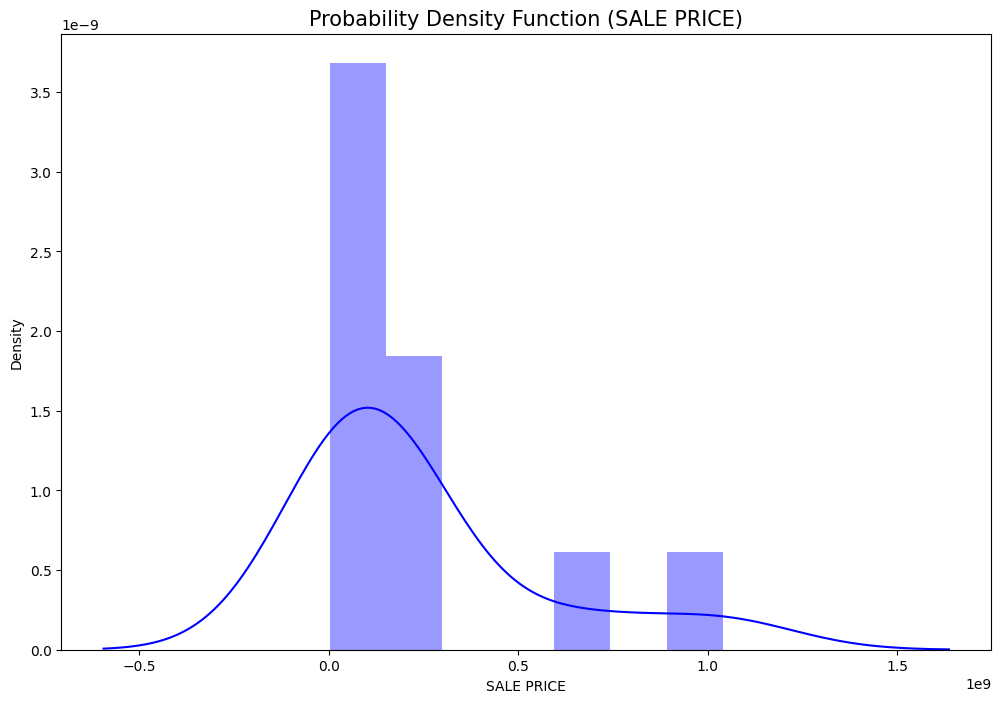

In [296]:
plt.figure(figsize=(12,8))
sns.distplot(df[mask]["SALE PRICE"], kde=True, color='blue')
plt.title("Probability Density Function (SALE PRICE)", fontsize=15);

**Conclusion**

Dapat dilihat bahwa tingkat ketidaksimetrisan atau Skewness  lebih condong ke arah kiri artinya distribusi tidak normal yaitu terdapat harga jual yang jauh dari rata-rata.Karena distribusi dinyatakan tidak normal maka kita akan melakukan Central Limit Theorem untuk membuat distribusi data kita menjadi normal.

### Central Limit Theorem

In [297]:
# Mengambil sejumlah 1000 sample mean dari sejumlah 100 nilai acak.
r = 100
s = 1000
sample_mean = []
for i in range(s):
    sample = np.random.choice(a=df[mask]["SALE PRICE"], size=r)
    sample_mean.append(np.mean(sample))

C:\Users\acer\AppData\Local\Temp\ipykernel_3052\2614992155.py:3: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(sample_mean, kde=True, color='blue')


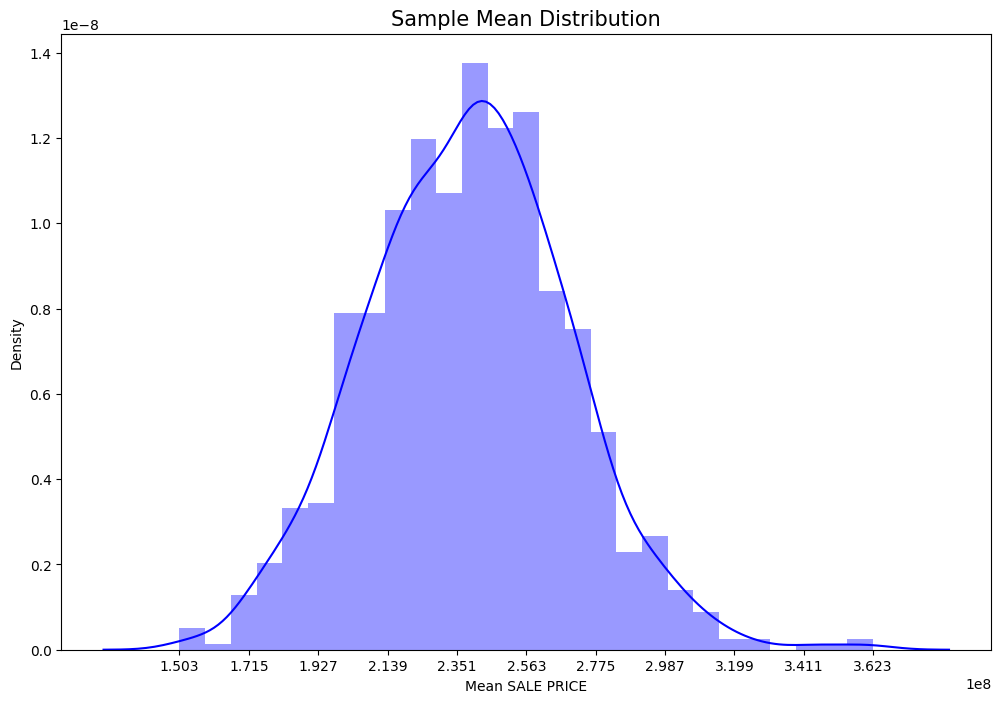

In [298]:
bin_edges = np.histogram(sample_mean)[1]
plt.figure(figsize=(12,8))
sns.distplot(sample_mean, kde=True, color='blue')
plt.title('Sample Mean Distribution', fontsize=15)
plt.xticks(np.round(bin_edges, 2))
plt.xlabel("Mean SALE PRICE");

Dapat dilihat data yang kita punya sudah berdistribusi normal.

---
# H. Confidence Intervals

Tingkat kepercayaan (confidence level) adalah ukuran percayaan dari sebuah pengujian selang kepercayaan

### Pertanyaan : Berapakah confidence intervals harga properti di lingkungan FINANCIAL?

In [299]:
mean_sampling = np.mean(sample_mean)
median_sampling = np.median(sample_mean)
std_sampling = np.std(sample_mean)
std_error = std_sampling/np.sqrt(r)
z_score = 1.96


print(f"Mean: {mean_sampling}")
print(f"Median: {median_sampling}")
print(f"Standard Deviation: {std_sampling}")
print(f"Standard Error: {std_error}")
print(f"Z-Score: {z_score}")

Mean: 238629745.34742
Median: 239207349.76999998
Standard Deviation: 30763283.148084797
Standard Error: 3076328.3148084795
Z-Score: 1.96


In [300]:
#Mencari CI
lower = mean_sampling - (z_score * std_error)
upper = mean_sampling + (z_score * std_error)

print(f"{lower} < x < {upper}")

232600141.85039538 < x < 244659348.84444463


**Conclusion**

Dapat dilihat bahwa kita telah mendapatkan nilai batas bawah sebesar  dan batas atas sebesar 233,528,600 US DOLLAR dan batas atas sebesar 245,299,120 US DOLLAR

---
# I. Hypothesis Testing

### Pertanyaan : Apakah harga jual rata-rata properti di Lingkungan FINANCIAL lebih tinggi daripada di ALPHABET CITY ?

In [303]:
df_sp_man = df[df['NEIGHBORHOOD'] == 'FINANCIAL']['SALE PRICE'].dropna()
df_sp_bro = df[df['NEIGHBORHOOD'] == 'ALPHABET CITY']['SALE PRICE'].dropna()

print('Average selling price in FINANCIAL:', '%10.2f' % (round(df_sp_man.mean(), 2)))
print('Average selling price in ALPHABET CITY: ', '%10.2f' % (round(df_sp_bro.mean(), 2)))

Average selling price in FINANCIAL: 239222666.55
Average selling price in ALPHABET CITY:  7200101.09


In [304]:
ztest, pval = sm.stats.ztest(df_sp_man, value=df_sp_bro.mean(), alternative='larger')
print(ztest, pval)

if pval < 0.05:
    print('Tolak hipotesis nol')
else:
    print('Terima hipotesis nol')

2.3937477685759294 0.008338606555526974
Tolak hipotesis nol


**Conclusion**

Karena nilai p yang dihitung dari uji-z lebih rendah dari tingkat kepercayaan standar, yaitu 0,05, kita dapat menolak hipotesis nol bahwa harga jual rata-rata properti di FINANCIAL sama dengan ALPHABET CITY.Hal ini dibuktikan dengan harga jual properti rata-rata di FINANCIAL lebih tinggi daripada di ALPHABET CITY.



# Overall Analysis

1. 25 LUXURY HOTEL memiliki harga jual rata-rata tertinggi yaitu sebesar **142,377,500 USD DOLLAR** berdasarkan kategori kelas bangunan

2. Di Wilayah Brooklyn alamat yang paling sering dibeli atau terjual adalah **569 MADISON STREET** dan posisi kedua yaitu pada wilayah Bronx alamat **3313 WILSON AVENUE**.

3. Rentang harga properti yang ada dilingkungan FINANSIAL yaitu 1.036.712.000 US DOLLAR

4. harga jual rata-rata properti di Lingkungan FINANCIAL lebih tinggi daripada di ALPHABET CITY
